In [1]:
from keras import models, layers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.
/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Train- and test-data.

In [2]:
(x_input_train, _), (x_input_test, y_output_test) = mnist.load_data()
x_input_train = x_input_train.astype("float32") / 255.0
x_input_test = x_input_test.astype("float32") / 255.0
print(x_input_train.shape)
print(x_input_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Variational autoencoder.

In [3]:
latent_dim = 2

# Create the encoder.
encoder_input = layers.Input(shape=(28, 28))
encoder_output = layers.Reshape((28 * 28,))(encoder_input)
encoder_output = layers.Dense(512, activation="relu")(encoder_output)
encoder = models.Model(encoder_input, encoder_output)

# Create the decoder.
decoder_input = layers.Input(shape=(latent_dim,))
decoder_output = layers.Dense(512, activation="relu")(decoder_input)
decoder_output = layers.Dense(28 * 28, activation="sigmoid")(decoder_output)
decoder_output = layers.Reshape((28, 28))(decoder_output)
decoder = models.Model(decoder_input, decoder_output)

# Create the autoencoder.
vae = ngdlmodels.VAE(encoder, decoder, latent_dim=latent_dim)
vae.compile(optimizer='adadelta', loss="binary_crossentropy")
vae.summary()

# Train.
print("Train...")
history = vae.fit(
        x_input_train, x_input_train,
        epochs=100,
        batch_size=32,
        shuffle=True,
        validation_data=(x_input_test, x_input_test)
    )
    
# Evaluate.
print("Evaluate...")
loss = vae.evaluate(x_input_test, x_input_test)
print("Loss:", loss)

Encoder:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 512)          401920      reshape_1[0][0]                  
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_1[0][0]                    
__________________________________________________________________________________________________
z

60000/60000 [==============================] - 20s 342us/step - loss: 0.1983 - val_loss: 0.1995
Epoch 45/100
60000/60000 [==============================] - 17s 290us/step - loss: 0.1980 - val_loss: 0.1993
Epoch 46/100
60000/60000 [==============================] - 18s 304us/step - loss: 0.1977 - val_loss: 0.1990
Epoch 47/100
60000/60000 [==============================] - 21s 343us/step - loss: 0.1974 - val_loss: 0.1988
Epoch 48/100
60000/60000 [==============================] - 23s 378us/step - loss: 0.1972 - val_loss: 0.1988
Epoch 49/100
60000/60000 [==============================] - 26s 441us/step - loss: 0.1969 - val_loss: 0.1987
Epoch 50/100
60000/60000 [==============================] - 25s 414us/step - loss: 0.1967 - val_loss: 0.1983
Epoch 51/100
60000/60000 [==============================] - 23s 381us/step - loss: 0.1965 - val_loss: 0.1984
Epoch 52/100
60000/60000 [==============================] - 22s 370us/step - loss: 0.1962 - val_loss: 0.1983
Epoch 53/100
60000/60000 [======

# Visualizing variational autoencoder.

Rendering history...


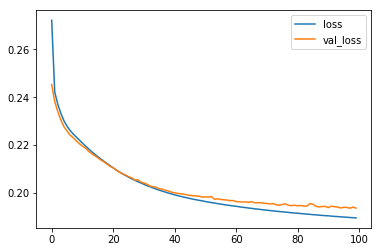

Rendering reconstructions...


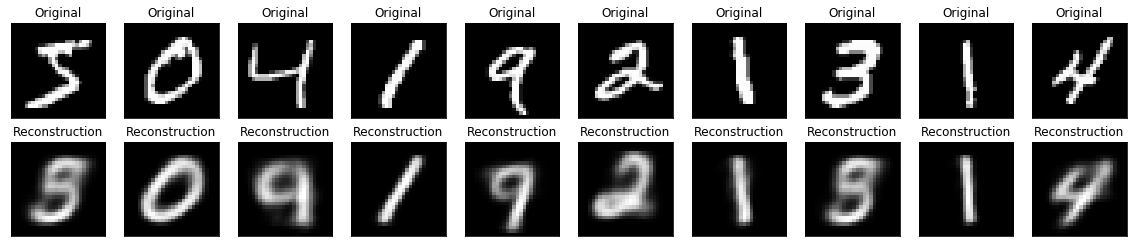

Rendering latent-space...


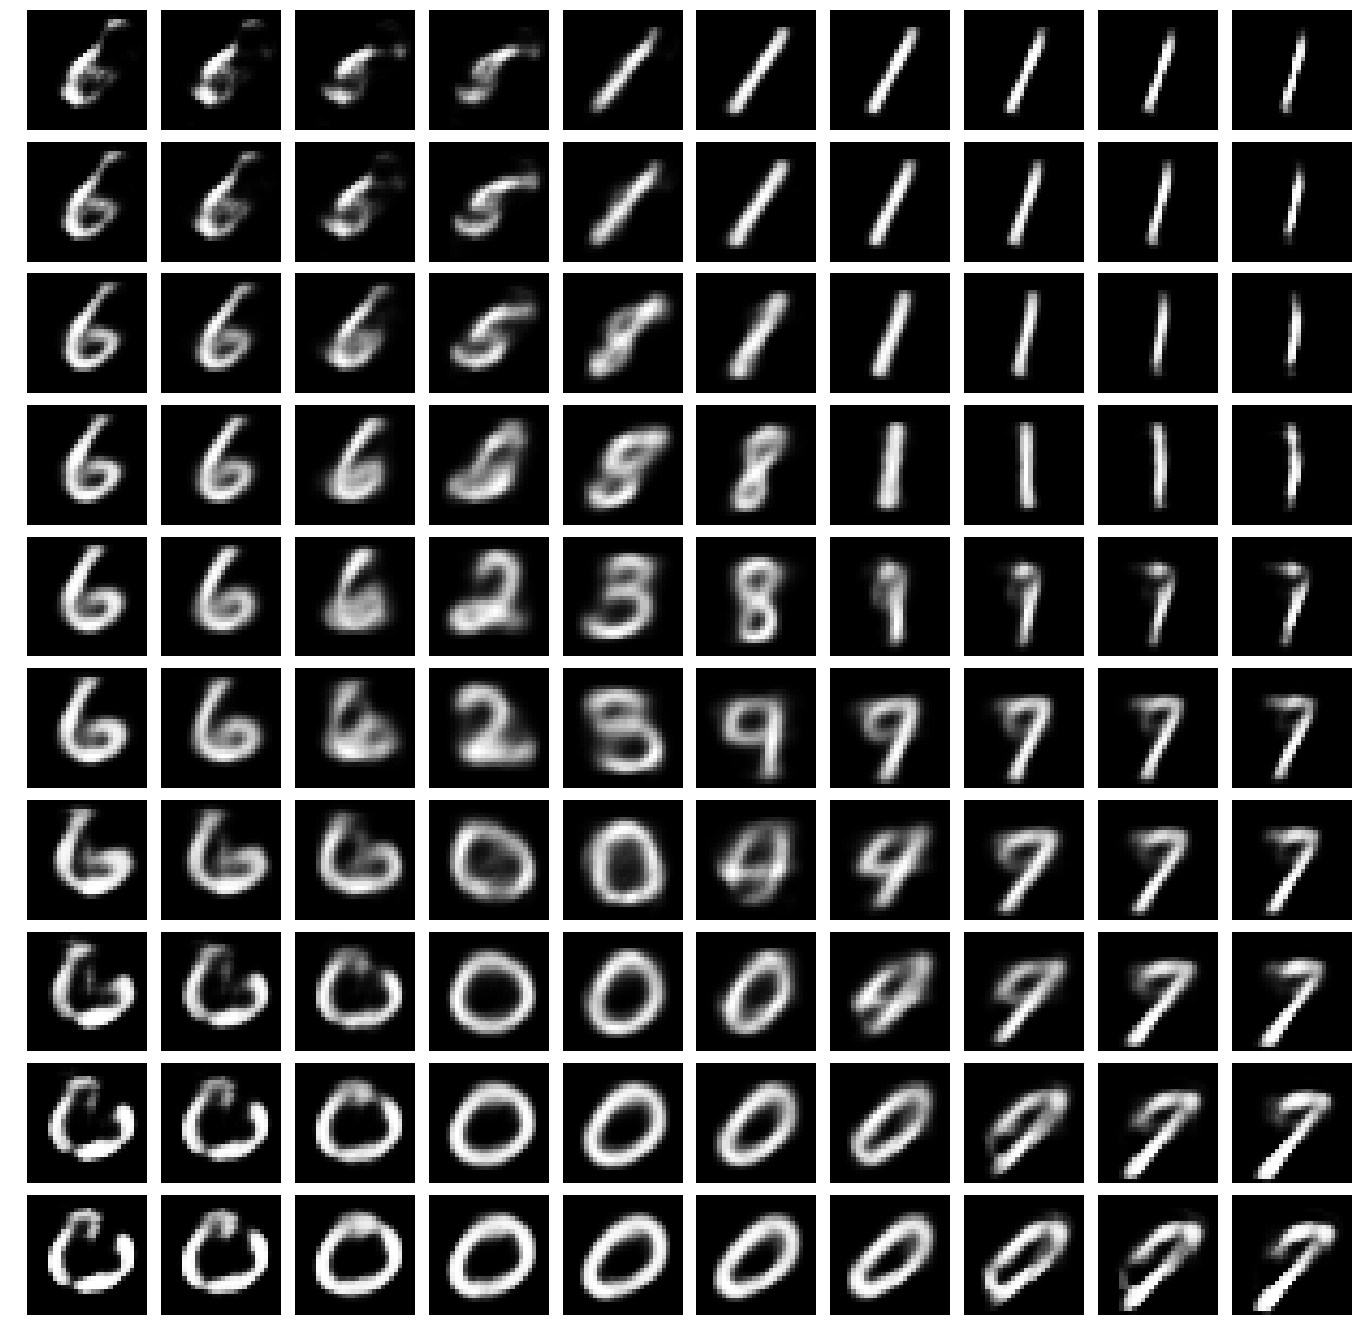

Rendering encodings...


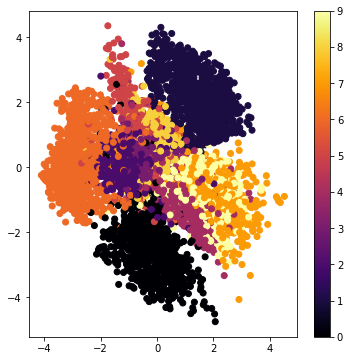

In [4]:
print("Rendering history...")
ngdlutils.render_history(history)

print("Rendering reconstructions...")
ngdlutils.render_image_reconstructions(vae, x_input_train[0:10])

print("Rendering latent-space...")
ngdlutils.render_image_latent_space(vae.decoder, 10)

print("Rendering encodings...")
ngdlutils.render_encodings(vae.encoder, x_input_test, y_output_test)